# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from scipy.stats import sem


# Study data files
mouse_metadata_path = "Starter_Code/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "Starter_Code/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single DataFrame
merged_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
total_mice = len(merged_df["Mouse ID"].unique())
total_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Ended up using chatgpt to figure out how to find rows where the combination of Mouse ID and Timepoint were duplicated using the Duplicated function
duplicates = merged_df[merged_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
print(duplicates["Mouse ID"].unique())

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# After I found the mouse ID that had the duplicates I pulled those rows out of the dataframe
duplicate_rows = merged_df.loc[merged_df["Mouse ID"] == "g989", :]
duplicate_rows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# I created my clean dateframe by returning rows that were not equal to the mouse ID I found
clean_df = merged_df.loc[merged_df["Mouse ID"] != "g989", :]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
new_total_mice = len(clean_df["Mouse ID"].unique())
new_total_mice

248

## Summary Statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = clean_df.groupby("Drug Regimen")
mean_tumor_volume = summary_stats["Tumor Volume (mm3)"].mean()
median_tumor_volume = summary_stats["Tumor Volume (mm3)"].median()
var_tumor_volume = summary_stats["Tumor Volume (mm3)"].var()
st_dev_tumor_volume = summary_stats["Tumor Volume (mm3)"].std()
SEM_tumor_volume = summary_stats["Tumor Volume (mm3)"].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({"Mean Tumor Volume": mean_tumor_volume, "Median Tumor Volume": median_tumor_volume, 
                              "Tumor Volume Variance": var_tumor_volume, "Tumor Volume Std. Dev.": st_dev_tumor_volume,
                             "Tumor Volume Std. Err.": SEM_tumor_volume})
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

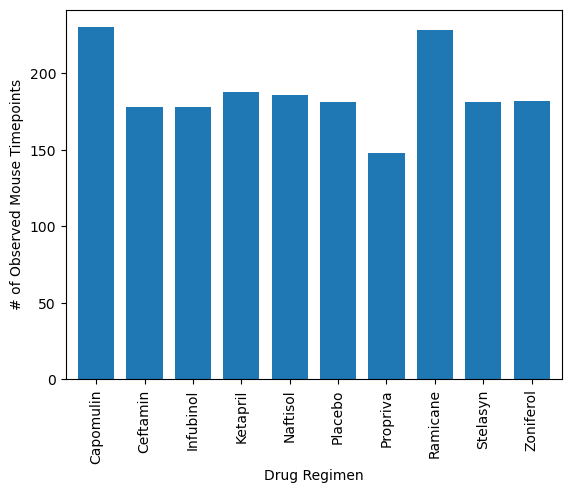

In [22]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# First count the number of timepoints for each regimen. Can use a groupby and count function for this
regimen_counts_pandas = clean_df.groupby("Drug Regimen")["Timepoint"].count()
pandas_bar = regimen_counts_pandas.plot(kind="bar", width=.75)
pandas_bar.set_xlabel("Drug Regimen")
pandas_bar.set_ylabel("# of Observed Mouse Timepoints")
plt.show()

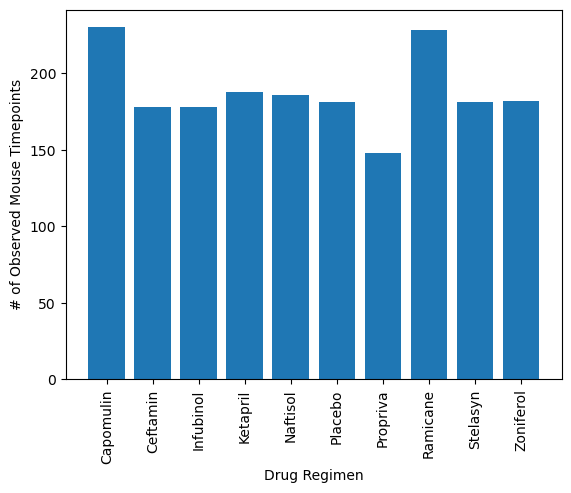

In [21]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts_pyplot = clean_df.groupby("Drug Regimen")["Timepoint"].count()
plt.bar(regimen_counts_pyplot.index, regimen_counts)
plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

In [11]:
mice_gender = clean_df.groupby("Sex")["Sex"].count()
desired_order = ["Male", "Female"]
mice_gender = mice_gender.reindex(desired_order)
mice_gender

Sex
Male      958
Female    922
Name: Sex, dtype: int64

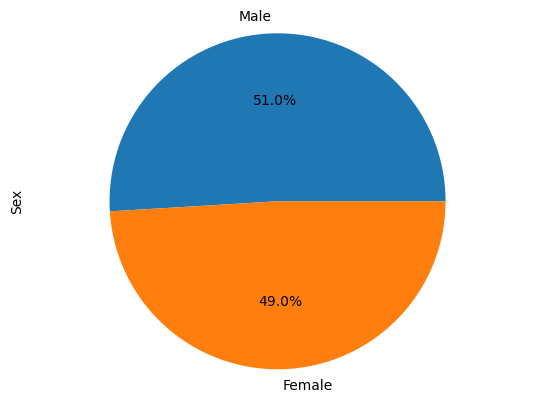

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_pie = mice_gender.plot(kind="pie", autopct="%1.1f%%")
plt.axis("equal")
plt.show()

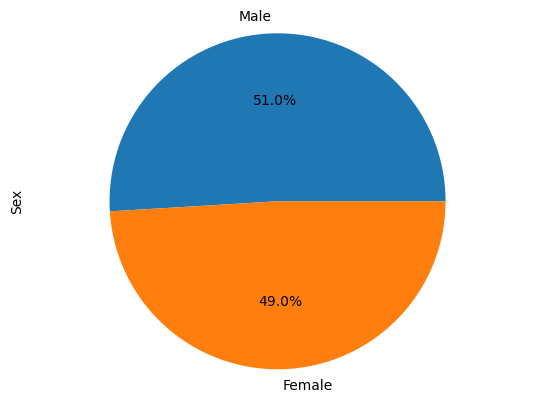

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mice_gender, labels=mice_gender.index, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
tumor_volume = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin") | 
                             (clean_df["Drug Regimen"] == "Ramicane") | 
                             (clean_df["Drug Regimen"] == "Infubinol") | 
                             (clean_df["Drug Regimen"] == "Ceftamin"), :]
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = tumor_volume.groupby("Mouse ID")["Timepoint"].max().reset_index()
max_timepoint
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_tumor_volume = pd.merge(max_timepoint, tumor_volume, on=["Mouse ID", "Timepoint"], how="left")
merged_tumor_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [25]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ceftamin", "Infubinol", "Ramicane"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments: 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = merged_tumor_volume.loc[merged_tumor_volume["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    # add subset
    tumor_vol_data.append(treatment_data)
    # Determine outliers using upper and lower bounds
    quartiles = treatment_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    # Calculate upper and lower bounds
    lower_bound = lowerq - 1.5 * iqr
    upper_bound = upperq + 1.5 * iqr

    # Identify potential outliers
    outliers = treatment_data.loc[(treatment_data < lower_bound) | (treatment_data > upper_bound)]

    print(f"Results for {treatment}:")
    print(f"Lower Quartile: {lowerq}")
    print(f"Upper Quartile: {upperq}")
    print(f"IQR: {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Potential Outliers: {outliers.tolist()}")
    print("\n")

Results for Capomulin:
Lower Quartile: 32.37735684
Upper Quartile: 40.1592203
IQR: 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Potential Outliers: []


Results for Ceftamin:
Lower Quartile: 48.72207785
Upper Quartile: 64.29983003
IQR: 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Potential Outliers: []


Results for Infubinol:
Lower Quartile: 54.04860769
Upper Quartile: 65.52574285
IQR: 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Potential Outliers: [36.3213458]


Results for Ramicane:
Lower Quartile: 31.56046955
Upper Quartile: 40.65900627
IQR: 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Potential Outliers: []




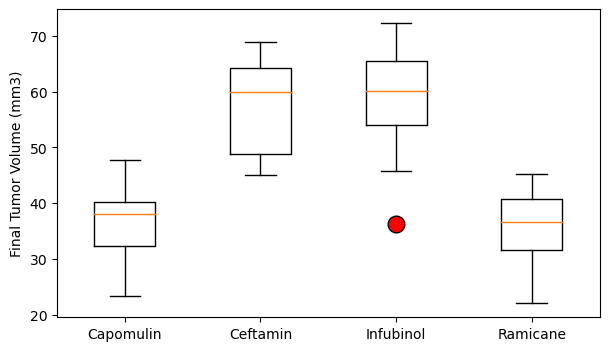

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(7, 4))
plt.boxplot(tumor_vol_data, labels=treatments, flierprops=dict(markerfacecolor='red', marker='o', markersize=12))
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

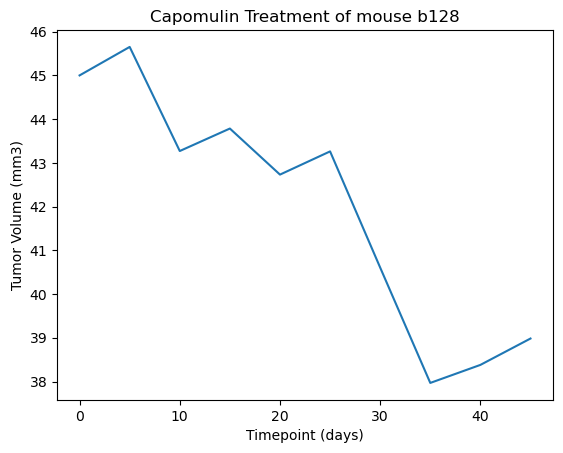

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# I first isolated the data for the mouse I had chosen 
single_mouse = clean_df.loc[clean_df["Mouse ID"] == "b128", :]
# I then created a line plot for the two columns I needed to within the dataframe and added the labels
single_mouse.plot(x="Timepoint", y="Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of mouse b128")
# Had to look up how to remove a legend because there was none in the answer. ChatGPT helped me with this
plt.legend().set_visible(False)
plt.show()



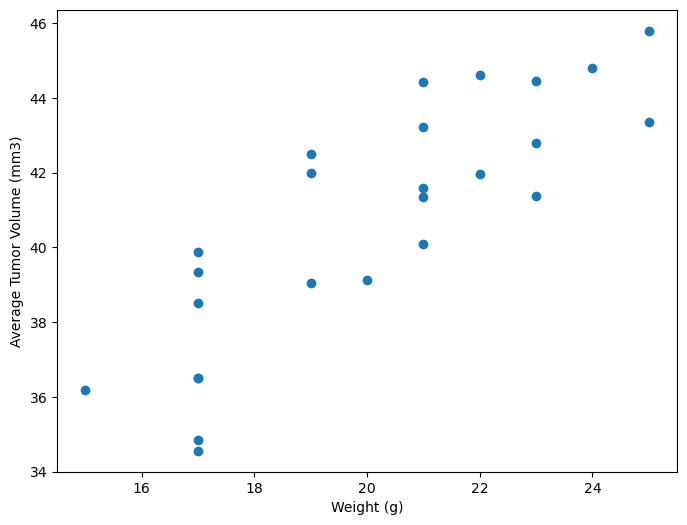

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# I was able to make this work by grouping by mouse ID and then taking the mean of Tumor volume for each mouse ID
capomulin = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin", :]
grouped_weight = capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().reset_index()
# I then pulled another datframe where I pulled the weight for each mouse. Luckily the weight was the same for each timepoint
mouse_weight = capomulin.groupby("Mouse ID")["Weight (g)"].max().reset_index()
# I then merged the data together so I could use the weight & average tumor volume columns on my scatter plot
merged_capomulin = pd.merge(grouped_weight, mouse_weight, on="Mouse ID", how="left")

plt.figure(figsize=(8, 6))
plt.scatter(merged_capomulin["Weight (g)"], merged_capomulin["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


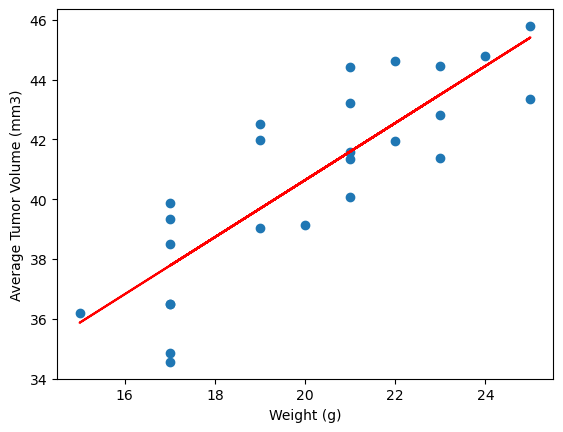

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Code for this was taken from the activities we performed in class
# First set the x and y values and then added the linear regression equation
x_values = merged_capomulin["Weight (g)"]
y_values = merged_capomulin["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Correlation formula was taken from activities in class. Plugged in the values and then printed the result
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
# Plotted the scatter plot showing the linear regression line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()